In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [3]:
#https://github.com/bradkav/WIMpy_NREFT
from WIMpy import DMUtils as DMU

#### WIMpy

WIMpy is designed to calculate nuclear recoil spectra for a number of DM-nucleon interactions (defined in the so-called non-relativistic effective field theory, NREFT, of Dark Matter). We won't need all that, just the 'Standard' spin-independent nuclear scattering.

Some more examples can be found at https://github.com/bradkav/WIMpy_NREFT/blob/master/Examples

In [4]:
#Properties of Silicon (number of protons and neutrons)
N_p_Si, N_n_Si = 14, 14

#Let's choose a particular benchmark model for the DM particle:
m_x = 1 #GeV
sigma_p = 1e-40 #cm^2

Er = np.geomspace(1e-3, 10, 100) #nuclear recoil energies in keV
dRdEr = DMU.dRdE_standard(Er, N_p_Si, N_n_Si, m_x, sigma_p) #in events/kg/keV/day

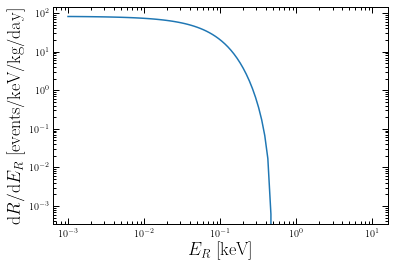

In [5]:
plt.figure()

plt.loglog(Er, dRdEr)

plt.xlabel(r"$E_R$ [keV]")
plt.ylabel(r"$\mathrm{d}R/\mathrm{d}E_R$ [events/keV/kg/day]")

plt.show()

#### Incorporating resolution and efficiency

In [6]:
#Let's make up some kind of (random) efficiency function
def efficiency(E):
    if (E < 1e-2):
        return 0   #Set efficiency to zero below 1e-2 keV
    else:
        return 1

In [7]:
#Let's assume a Gaussian resolution for this example
sigma_E = 1e-1 #1e-1 keV = 100 eV resolution
def resolution(E1, E2):
    return (2*np.pi*sigma_E**2)**-0.5*np.exp(-0.5*(E1 - E2)**2/sigma_E**2)

In [8]:
#Now calculate the recoil spectrum of detected energy (by convolving with the resolution 
#and multiplying by the efficiency)
def calc_dRdE_det(E):
    integrand = lambda x: DMU.dRdE_standard(x, N_p_Si, N_n_Si, m_x, sigma_p)*resolution(x, E)
    Emin = np.clip(E-5*sigma_E, 0, 100) #Integrate over a range within 5-sigma of the observed recoil energy
    Emax = np.clip(E+5*sigma_E, 0, 100)
    return efficiency(E)*quad(integrand, Emin, Emax)[0]

In [9]:
dRdEr_det = np.array([calc_dRdE_det(E) for E in Er])

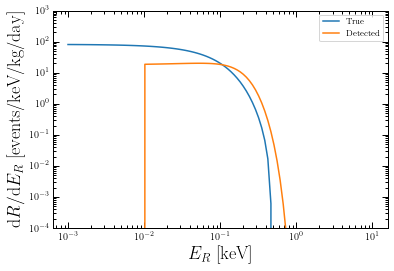

In [10]:
plt.figure()

plt.loglog(Er, dRdEr, label='True')
plt.loglog(Er, dRdEr_det, label='Detected')

plt.xlabel(r"$E_R$ [keV]")
plt.ylabel(r"$\mathrm{d}R/\mathrm{d}E_R$ [events/keV/kg/day]")

plt.ylim(1e-4, 1e3)

plt.legend()

plt.show()